<a href="https://colab.research.google.com/github/amelliaaas/TugasTKC_282-305/blob/main/Replika_Jurnal_TKC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Covid19-dataset

/content/drive/MyDrive/Covid19-dataset


In [3]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [4]:
!cat /proc/meminfo

MemTotal:       13302916 kB
MemFree:        10717352 kB
MemAvailable:   12468424 kB
Buffers:          121652 kB
Cached:          1782996 kB
SwapCached:            0 kB
Active:           981012 kB
Inactive:        1384040 kB
Active(anon):     428724 kB
Inactive(anon):      460 kB
Active(file):     552288 kB
Inactive(file):  1383580 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              3140 kB
Writeback:             0 kB
AnonPages:        460316 kB
Mapped:           272360 kB
Shmem:              1180 kB
KReclaimable:     113568 kB
Slab:             155392 kB
SReclaimable:     113568 kB
SUnreclaim:        41824 kB
KernelStack:        5952 kB
PageTables:         6780 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651456 kB
Committed_AS:    3653768 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8480 kB
VmallocChunk:          0 kB
Percpu:          

**Resnet50**

In [5]:
import os
import argparse
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

plt.style.use('ggplot')

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import random 
import shutil
from skimage import io, transform
import math
import torch
import pandas as pd
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision import datasets, transforms
import torch.nn.functional as F
from torchvision.utils import make_grid
import helper
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

print("using Pytorch version", torch.__version__)

using Pytorch version 1.10.0+cu111


In [7]:
ls

acc_1.svg  model_2.pt  test/  train/


In [8]:
imagePathsTrain = list(paths.list_images("/content/drive/MyDrive/Covid19-dataset/train"))
trainX = []
trainY = []

for imagePath in imagePathsTrain:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	trainX.append(image)
	trainY.append(label)

trainX = np.array(trainX, dtype="float32")
trainY = np.array(trainY)

lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
trainY = to_categorical(trainY)

In [9]:
imagePathsTest = list(paths.list_images("/content/drive/MyDrive/Covid19-dataset/test"))
testX = []
testY = []

for imagePath in imagePathsTest:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	testX.append(image)
	testY.append(label)

testX = np.array(testX, dtype="float32")
testY = np.array(testY)

lb = LabelEncoder()
testY = lb.fit_transform(testY)
testY = to_categorical(testY)

In [10]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.15, random_state=42, stratify=trainY)

In [11]:
print("SHAPE OF TRAIN FEATURES: "+str(trainX.shape))
print("SHAPE OF TRAIN LABELS: "+str(trainY.shape))
print("SHAPE OF VALIDATION FEATURES: "+str(valX.shape))
print("SHAPE OF VALIDATION LABELS: "+str(valY.shape))
print("SHAPE OF TEST FEATURES: "+str(testX.shape))
print("SHAPE OF TEST LABELS: "+str(testY.shape))

SHAPE OF TRAIN FEATURES: (213, 224, 224, 3)
SHAPE OF TRAIN LABELS: (213, 3)
SHAPE OF VALIDATION FEATURES: (38, 224, 224, 3)
SHAPE OF VALIDATION LABELS: (38, 3)
SHAPE OF TEST FEATURES: (66, 224, 224, 3)
SHAPE OF TEST LABELS: (66, 3)


In [12]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [13]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [14]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = True

opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

94781440/94765736 [==============================] - 1s 0us/step


In [15]:
HR = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(valX, valY),
	validation_steps=len(valX) // BS,
	epochs=EPOCHS)

Epoch 1/20
6/6 [==============================] - 136s 21s/step - loss: 1.2002 - accuracy: 0.4420 - val_loss: 1.0599 - val_accuracy: 0.5526
Epoch 2/20
6/6 [==============================] - 129s 21s/step - loss: 0.8189 - accuracy: 0.6519 - val_loss: 0.8484 - val_accuracy: 0.7105
Epoch 3/20
6/6 [==============================] - 127s 21s/step - loss: 0.6309 - accuracy: 0.7569 - val_loss: 0.8756 - val_accuracy: 0.6579
Epoch 4/20
6/6 [==============================] - 128s 21s/step - loss: 0.4234 - accuracy: 0.8785 - val_loss: 1.1404 - val_accuracy: 0.5263
Epoch 5/20
6/6 [==============================] - 127s 21s/step - loss: 0.3855 - accuracy: 0.8840 - val_loss: 1.3122 - val_accuracy: 0.5263
Epoch 6/20
6/6 [==============================] - 127s 21s/step - loss: 0.2419 - accuracy: 0.9448 - val_loss: 1.4272 - val_accuracy: 0.5789
Epoch 7/20
6/6 [==============================] - 131s 21s/step - loss: 0.2053 - accuracy: 0.9337 - val_loss: 1.6544 - val_accuracy: 0.6053
Epoch 8/20
6/6 [====

In [16]:
model.save('model1.h5')

In [17]:
!pip install pyyaml h5py
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.hdf5")
print("Saved model to disk")

Saved model to disk


**Preparing Train and Test data**

In [18]:
class_names = ['Normal', 'Viral Pneumonia', 'Covid']
data_dir = '/content/drive/MyDrive/Covid19-dataset'

In [19]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [20]:
train_ds = ImageFolder(data_dir+'/train', train_transform)
test_ds = ImageFolder(data_dir+'/test', test_transform)
classes = train_ds.classes

In [21]:
classes

['Covid', 'Normal', 'Viral Pneumonia']

Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 251
Counts: {'Covid': 111, 'Normal': 70, 'Viral Pneumonia': 70}


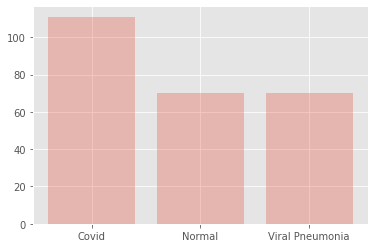

In [22]:
def describe_dataset(data):
    classes_count = { c:0 for c in classes}
    for _,label in data:
        classes_count[classes[label]]+=1

    print(f'Classes: {len(classes)} - {classes} ')
    print(f'Examples: {len(data)}')
    print(f'Counts: {classes_count}')
    plt.bar(classes_count.keys(),classes_count.values(), alpha=0.3 )

    return classes_count

_ = describe_dataset(train_ds)


TRAIN DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 221
Counts: {'Covid': 97, 'Normal': 65, 'Viral Pneumonia': 59}

VALIDATION DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 30
Counts: {'Covid': 14, 'Normal': 5, 'Viral Pneumonia': 11}

TEST DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 66
Counts: {'Covid': 26, 'Normal': 20, 'Viral Pneumonia': 20}


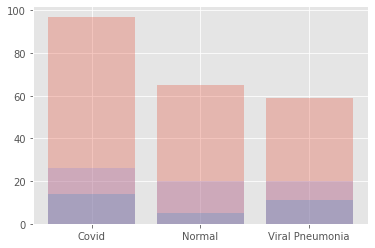

In [23]:
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed);

val_size = 30
train_size = len(train_ds) - val_size

train_ds, val_ds = random_split(train_ds, [train_size, val_size])

print("\nTRAIN DATASET")
_=describe_dataset(train_ds)

print("\nVALIDATION DATASET")
_=describe_dataset(val_ds)

print("\nTEST DATASET")
_=describe_dataset(test_ds)

dataset = None
new_dataset = None

In [24]:
batch_size = 5

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=3, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(train_loader))
print('Number of validation batches', len(valid_loader))
print('Number of test batches', len(test_loader))

Number of training batches 45
Number of validation batches 6
Number of test batches 14


**Data Visualization**

In [25]:
def show_images(images, labels, preds):
    plt.figure(figsize=(8, 4))
    for i, image in enumerate(images):
        plt.subplot(1, 6, i + 1, xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
        col = 'green'
        if preds[i] != labels[i]:
            col = 'red'
            
        plt.xlabel(f'{classes[int(labels[i].numpy())]}')
        plt.ylabel(f'{classes[int(preds[i].numpy())]}', color=col)
        if(i==5):
            break
    plt.tight_layout()
    plt.show()

In [26]:
images, labels = next(iter(train_loader))

In [27]:
images.shape

torch.Size([5, 3, 224, 224])

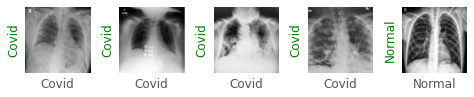

In [28]:
show_images(images, labels, labels) #passing the predicitons as the labels

In [29]:
print(train_ds[0][0].shape)
train_ds[0]

torch.Size([3, 224, 224])


(tensor([[[-1.8268, -1.8097, -1.8097,  ..., -1.7069, -1.6898, -1.7069],
          [-1.8439, -1.8268, -1.8268,  ..., -1.6898, -1.6898, -1.7240],
          [-1.8439, -1.8439, -1.8268,  ..., -1.6898, -1.6898, -1.7069],
          ...,
          [-1.7583, -1.7240, -1.7240,  ..., -1.8782, -1.8610, -1.8610],
          [-1.7754, -1.7240, -1.7240,  ..., -1.8610, -1.8782, -1.8782],
          [-1.7412, -1.7240, -1.7240,  ..., -1.8610, -1.8782, -1.8782]],
 
         [[-1.7381, -1.7206, -1.7206,  ..., -1.6155, -1.5980, -1.6155],
          [-1.7556, -1.7381, -1.7381,  ..., -1.5980, -1.5980, -1.6331],
          [-1.7556, -1.7556, -1.7381,  ..., -1.5980, -1.5980, -1.6155],
          ...,
          [-1.6681, -1.6331, -1.6331,  ..., -1.7906, -1.7731, -1.7731],
          [-1.6856, -1.6331, -1.6331,  ..., -1.7731, -1.7906, -1.7906],
          [-1.6506, -1.6331, -1.6331,  ..., -1.7731, -1.7906, -1.7906]],
 
         [[-1.5081, -1.4907, -1.4907,  ..., -1.3861, -1.3687, -1.3861],
          [-1.5256, -1.5081,

In [30]:
def show_example(img, label):
    print('Label: ', classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  Normal (1)


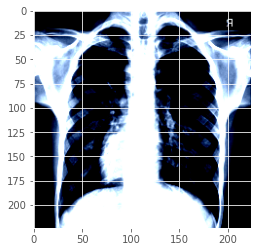

In [31]:
show_example(*train_ds[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  Viral Pneumonia (2)


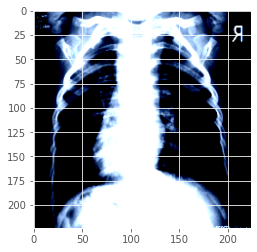

In [32]:
show_example(*train_ds[90])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


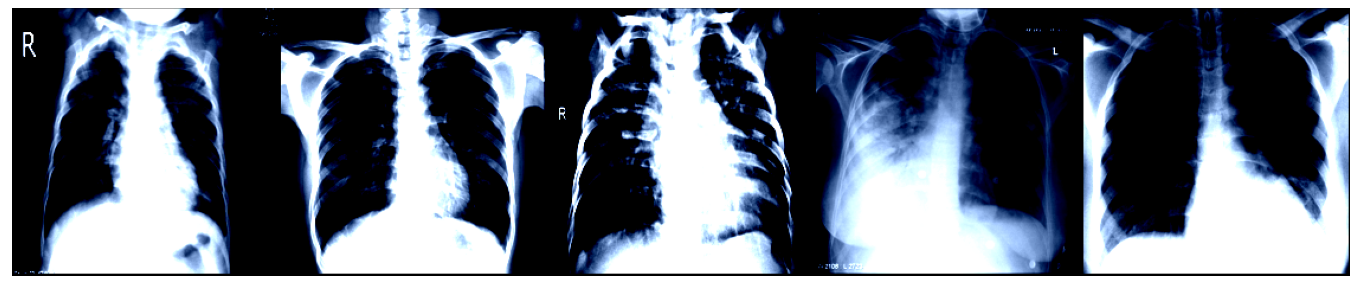

In [33]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(24, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

show_batch(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


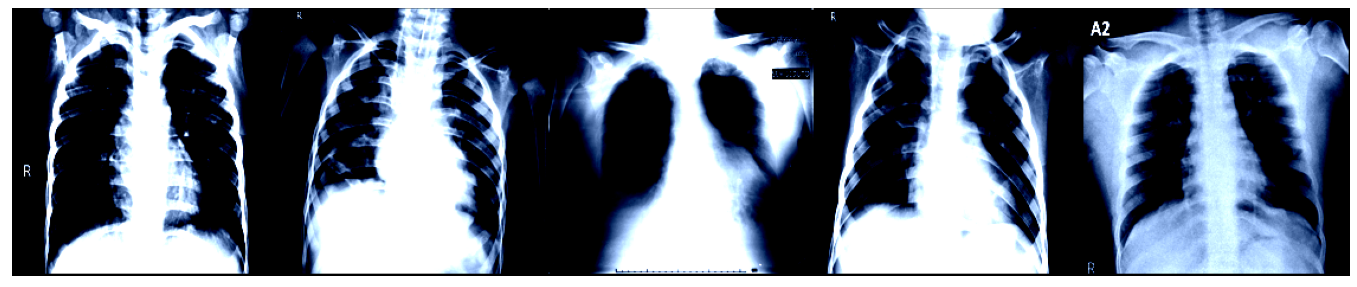

In [34]:
show_batch(test_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


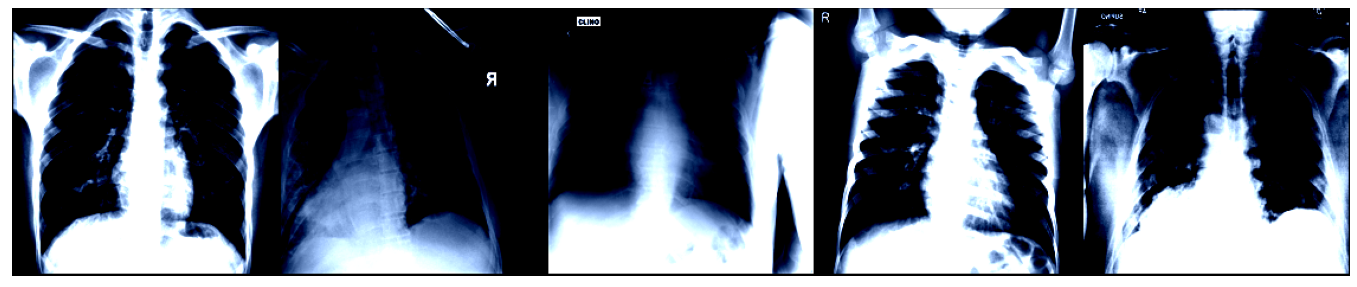

In [35]:
show_batch(valid_loader)

**VGG 19**

In [36]:
def change_device(input):
    if torch.cuda.is_available():
        return input.cuda()
    else:
        return input

In [37]:
def train(model, train_loader):
    
    model.train()
    
    epoch_loss = 0

    for train_step, (images, labels) in enumerate(train_loader):

        x_train = change_device(images)
        y_train = change_device(labels)

        optimizer.zero_grad()
        
        y_pred = model(x_train)
        
        loss = loss_fn(y_pred,y_train)
        
        loss.backward()
        
        optimizer.step()

        if(train_step%20==0):
            print(f"batch:   {train_step}   train_loss   {loss.item()}   perplexity   = {torch.exp(loss)}")
        
        epoch_loss += loss.item()
        
    return epoch_loss / (train_step +1 )

In [38]:
def evaluate(model, loader):
    
    model.eval()
    print("validation/test set evaluation")
    epoch_loss = 0
    
    with torch.no_grad():
        accuracy = 0
        for val_step, (images, labels) in enumerate(loader):
            x_train = change_device(images)
            y_train = change_device(labels)

            y_pred = model(x_train)

            loss = loss_fn(y_pred,y_train)

            _, preds = torch.max(y_pred, 1)
            accuracy += sum(( preds.cpu() == labels).numpy())

            if(val_step%3==0):
                print(f"batch:   {val_step}   validation_loss   {loss.item()}   perplexity   = {torch.exp(loss)}")
        
            epoch_loss += loss.item()
        accuracy = accuracy/len(val_ds)
        print(f' Accuracy: {accuracy:.4f}')

    return epoch_loss / (val_step + 1)

In [39]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [40]:
def show_preds(model,loader):
    model.eval() 
    print("test set evaluation")

    with torch.no_grad():
        accuracy = 0
        for test_step, (images, labels) in enumerate(loader):
            x_train = change_device(images)
            y_train = change_device(labels)

            y_pred = model(x_train)

            loss = loss_fn(y_pred,y_train)

            _, preds = torch.max(y_pred, 1)
          
            accuracy += sum(( preds.cpu() == labels).numpy())
        accuracy = accuracy/len(test_ds)
        print(f' Accuracy: {accuracy:.4f}')

    show_images(images, labels, preds.cpu())

In [41]:
class VGGNet(nn.Module):
    def __init__ (self):
        super(VGGNet,self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,padding=1,stride=1) #224
        self.maxPool1 = nn.MaxPool2d(2,2)

        self.conv2 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1,stride=1) #112
        self.maxPool2 = nn.MaxPool2d(2,2)

        self.conv3 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1,stride=1) #56
        self.maxPool3 = nn.MaxPool2d(2,2)

        self.conv4 = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,padding=1,stride=1) #28
        self.maxPool4 = nn.MaxPool2d(2,2)

        self.conv5 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=1,padding=0,stride=1)
        self.maxPool5 = nn.MaxPool2d(2,2)

        self.conv6 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1,stride=1) #14
        self.maxPool6 = nn.MaxPool2d(2,2)

        self.fc1 = nn.Linear(4608,1024) #7
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,3)

    def forward(self , x):
               
        x = self.maxPool1(F.relu(self.conv1(x)))

        x = self.maxPool2(F.relu(self.conv2(x)))

        x = self.maxPool3(F.relu(self.conv3(x)))

        x = self.maxPool4(F.relu(self.conv4(x)))

        x = self.maxPool5(F.relu(self.conv5(x)))

        x = self.maxPool6(F.relu(self.conv6(x)))

        x = x.reshape(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x

In [42]:
model = change_device(VGGNet())

In [43]:
model

VGGNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
  (maxPool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (f

In [44]:
for param in model.parameters():
    print(f' {param.size()} parameters are {param.numel()}')

 torch.Size([64, 3, 3, 3]) parameters are 1728
 torch.Size([64]) parameters are 64
 torch.Size([128, 64, 3, 3]) parameters are 73728
 torch.Size([128]) parameters are 128
 torch.Size([256, 128, 3, 3]) parameters are 294912
 torch.Size([256]) parameters are 256
 torch.Size([512, 256, 3, 3]) parameters are 1179648
 torch.Size([512]) parameters are 512
 torch.Size([512, 512, 1, 1]) parameters are 262144
 torch.Size([512]) parameters are 512
 torch.Size([512, 512, 3, 3]) parameters are 2359296
 torch.Size([512]) parameters are 512
 torch.Size([1024, 4608]) parameters are 4718592
 torch.Size([1024]) parameters are 1024
 torch.Size([512, 1024]) parameters are 524288
 torch.Size([512]) parameters are 512
 torch.Size([3, 512]) parameters are 1536
 torch.Size([3]) parameters are 3


In [45]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters and total memory usage is {count_parameters(model)*(4/(2**20)*3)} mb')

The model has 9,419,395 trainable parameters and total memory usage is 107.79642105102539 mb


In [46]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

In [47]:
N_EPOCHS = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_loader)
    valid_loss = evaluate(model, valid_loader)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        print("saving the model")
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model_2.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

batch:   0   train_loss   1.0941715240478516   perplexity   = 2.9867072105407715
batch:   20   train_loss   1.0987821817398071   perplexity   = 3.000509738922119
batch:   40   train_loss   1.1022812128067017   perplexity   = 3.0110270977020264
validation/test set evaluation
batch:   0   validation_loss   1.0950349569320679   perplexity   = 2.9892871379852295
batch:   3   validation_loss   1.078909158706665   perplexity   = 2.941469192504883
 Accuracy: 0.7000
saving the model
Epoch: 01 | Time: 1m 46s
	Train Loss: 1.098 | Train PPL:   2.997
	 Val. Loss: 1.088 |  Val. PPL:   2.967


In [56]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf

model = VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3))

model.save('model3.h5')

loaded_model3 = tf.keras.models.load_model('model3.h5')

**3. DenseNet 169**

implementation densenet 169


In [58]:
class DenseNet(nn.Module):
    def __init__(self, img_channels, num_classes, num_init_features, growth_factor,layers):
        super(DenseNet,self).__init__()

        self.growth_factor = growth_factor

        self.conv1 = nn.Conv2d(in_channels=img_channels,out_channels=num_init_features,kernel_size=7,padding=3,stride=2)

        self.bn = nn.BatchNorm2d(num_init_features)

        self.relu = nn.ReLU()

        self.maxpool = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)

        self.denselayer1 = self.make_layer(DenseBlock,num_init_features, layers[0])

        self.transitionlayer1 = TransitionBlock(num_init_features + self.growth_factor*layers[0])

        self.denselayer2 = self.make_layer(DenseBlock,int((num_init_features + growth_factor*layers[0])/2), layers[1])

        self.transitionlayer2 = TransitionBlock(int((num_init_features + self.growth_factor*layers[0])/2 + self.growth_factor*layers[1]))

        self.denselayer3 = self.make_layer(DenseBlock,int(((num_init_features + self.growth_factor*layers[0])/2 + self.growth_factor*layers[1])/2), layers[2])

        self.transitionlayer3 = TransitionBlock(int(((num_init_features + self.growth_factor*layers[0])/2 + self.growth_factor*layers[1])/2) + self.growth_factor*layers[2])

        self.denselayer4 = self.make_layer(DenseBlock,int((((num_init_features + self.growth_factor*layers[0])/2 + self.growth_factor*layers[1])/2 + self.growth_factor*layers[2])/2), 
                                      layers[3])

        self.averagepool = nn.AdaptiveAvgPool2d(1)

        self.fc = nn.Linear(int(num_init_features/8 + self.growth_factor*(layers[0]/8 + layers[1]/4 + layers[2]/2 + layers[3])),num_classes) #we only need to chage the output features while pre training

    def forward(self, x):
        x = self.relu(self.bn(self.conv1(x)))
        x = self.maxpool(x)
        x = self.denselayer1(x)
        x = self.transitionlayer1(x)
        x = self.denselayer2(x)
        x = self.transitionlayer2(x)
        x = self.denselayer3(x)
        x = self.transitionlayer3(x)
        x = self.denselayer4(x)
        x = self.averagepool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)

        return x

    def make_layer(self, DenseBlock, features, layer):
        dense_block = []
        for i in range(layer):
            dense_block.append(DenseBlock(features + i*32,self.growth_factor))

        return nn.Sequential(*dense_block)

class DenseBlock(nn.Module):
    def __init__ (self,input_features, growth_factor):
        super(DenseBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(input_features)
        self.relu1 = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=input_features,out_channels=4*growth_factor,kernel_size=1,stride=1)
        self.bn2 = nn.BatchNorm2d(4*growth_factor)
        self.relu2 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=4*growth_factor,out_channels=growth_factor,kernel_size=3,stride=1,padding=1)

    def forward(self, x):
        concat_layer = x.clone()
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv1(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.conv2(x)

        return torch.cat((concat_layer, x), dim=1)



class TransitionBlock(nn.Module):
    def __init__(self, input_features):
        super(TransitionBlock,self).__init__()
        self.bn = nn.BatchNorm2d(input_features)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=input_features,out_channels=int(input_features/2),kernel_size=1,stride=1,padding=0)
        self.avpool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.bn(x)
        x = self.relu(x)
        x = self.conv1(x)
        x = self.avpool(x)

        return x






def DenseNet169(img_channels=3, num_classes=1000,num_init_features=64,growth_factor=32):
    return DenseNet(img_channels,num_classes, num_init_features, growth_factor,[6, 12, 32, 32])

def DenseNet201(img_channels=3, num_classes=1000,num_init_features=64,growth_factor=32):
    return DenseNet(img_channels,num_classes, num_init_features, growth_factor,[6, 12, 48, 32])

def DenseNet264(img_channels=3, num_classes=1000,num_init_features=64,growth_factor=32):
    return DenseNet(img_channels,num_classes, num_init_features, growth_factor,[6, 12, 64, 48])

In [59]:
model = change_device(DenseNet169(3,3)) 


In [60]:
model

DenseNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denselayer1): Sequential(
    (0): DenseBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): DenseBlock(
      (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [61]:
for param in model.parameters():
    print(f' {param.size()} parameters are {param.numel()}')

 torch.Size([64, 3, 7, 7]) parameters are 9408
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([128, 64, 1, 1]) parameters are 8192
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([32, 128, 3, 3]) parameters are 36864
 torch.Size([32]) parameters are 32
 torch.Size([96]) parameters are 96
 torch.Size([96]) parameters are 96
 torch.Size([128, 96, 1, 1]) parameters are 12288
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([32, 128, 3, 3]) parameters are 36864
 torch.Size([32]) parameters are 32
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([128, 128, 1, 1]) parameters are 16384
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128

In [62]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters and total memory usage is {count_parameters(model)*(4/(2**20)*3)} mb')


The model has 12,500,355 trainable parameters and total memory usage is 143.0552101135254 mb


In [63]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

In [64]:
N_EPOCHS = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_loader)
    valid_loss = evaluate(model, valid_loader)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        print("saving the model")
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model_1_densenet.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')


batch:   0   train_loss   1.1108906269073486   perplexity   = 3.037062168121338
batch:   20   train_loss   1.1787457466125488   perplexity   = 3.2502949237823486
batch:   40   train_loss   0.6461608409881592   perplexity   = 1.9082008600234985
validation/test set evaluation
batch:   0   validation_loss   0.541821300983429   perplexity   = 1.719135046005249
batch:   3   validation_loss   0.8738006353378296   perplexity   = 2.3959999084472656
 Accuracy: 0.5333
saving the model
Epoch: 01 | Time: 2m 57s
	Train Loss: 0.831 | Train PPL:   2.295
	 Val. Loss: 0.701 |  Val. PPL:   2.015


In [66]:
from tensorflow.keras.applications import DenseNet169
import tensorflow as tf

model = DenseNet169(include_top = False, weights = 'imagenet', input_shape = (224,224,3))

model.save('model4.h5')

loaded_model3 = tf.keras.models.load_model('model4.h5')

51888128/51877672 [==============================] - 1s 0us/step


Summary

In [68]:
import plotly.figure_factory as ff

data_matrix = [['Classes','Data_available'],
               ['Normal', 70],
               ['Viral_Pneumonia', 70],
               ['Covid', 111]]

colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

fig = ff.create_table(data_matrix,colorscale=colorscale)
fig.update_layout(
    title_text = 'Data used for training',
    margin = {'t':40},
    height = 200,
    title_x=0.5
)
fig.show()


In [70]:
import plotly.figure_factory as ff

data_matrix = [['Testing paramter','Self-VGG-19', 'Self-Resnet','Pre-trained Resnet','Self-Densenet','Pre-trained Densenet'],
               ['Accuracy', 0.7000, 0.8667, 0.9667, 0.5000, 0.9667]]

fig = ff.create_table(data_matrix)
fig.show()
